#KNN Classifier

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#import the dataset
dataset=pd.read_csv('final_dataset.csv')
X=dataset.iloc[:,:-1].values    # predictor attributes
y=dataset.iloc[:,-1].values     # target attributes

In [4]:
dataset.head(10)

,Unnamed: 0,Total Backward Packets,Total Length of Bwd Packets,Bwd Packet Length Max,Flow Packets/s,Bwd Packets/s,Packet Length Variance,PSH Flag Count,Down/Up Ratio,Subflow Bwd Packets,...,Init_Win_bytes_forward,act_data_pkt_fwd,min_seg_size_forward,Flow Duration,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,Idle Std,Label
0,0,10.0,68.0,20.0,0.210025,0.123544,2.770409e+06,0.0,1.0,10.0,...,229.0,5.0,20.0,80942880.0,5058930.00,73600000.0,13500000.0,80300000.0,47300000.0,BENIGN
1,1,1.0,6.0,6.0,153846.160000,76923.080000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,13.0,13.00,13.0,0.0,0.0,0.0,PortScan
2,2,9.0,62.0,20.0,0.211247,0.126748,3.662699e+06,0.0,1.0,9.0,...,229.0,4.0,20.0,71007070.0,5071934.00,66900000.0,14200000.0,70600000.0,0.0,BENIGN
3,3,7.0,11595.0,5792.0,67.655790,47.359055,3.327892e+06,1.0,2.0,7.0,...,29200.0,1.0,32.0,147807.0,16423.00,135274.0,6010.0,11001.0,0.0,DDoS
4,4,1.0,6.0,6.0,35087.720000,17543.860000,5.333334e+00,1.0,1.0,1.0,...,1024.0,0.0,24.0,57.0,57.00,57.0,0.0,0.0,0.0,PortScan
5,5,7.0,11595.0,7240.0,0.160093,0.070041,3.150539e+06,0.0,0.0,7.0,...,274.0,1.0,32.0,99941730.0,6662782.00,99800000.0,12500000.0,99800000.0,0.0,DDoS
6,6,0.0,0.0,0.0,666666.700000,0.000000,6.533334e+01,0.0,0.0,0.0,...,229.0,0.0,32.0,3.0,3.00,3.0,3.0,3.0,0.0,FTP-Patator
7,7,4.0,11632.0,11632.0,1.075708,0.358569,1.040000e+07,1.0,0.0,4.0,...,29200.0,1.0,32.0,11155440.0,1014130.94,6149866.0,879717.0,6156234.0,0.0,DDoS
8,8,6.0,11595.0,4344.0,0.153080,0.070652,2.131709e+06,0.0,0.0,6.0,...,274.0,2.0,20.0,84923110.0,7076926.00,84800000.0,14100000.0,84800000.0,0.0,DDoS
9,9,1.0,6.0,6.0,45454.547000,22727.273000,0.000000e+00,0.0,1.0,1.0,...,58.0,0.0,20.0,44.0,44.00,44.0,0.0,0.0,0.0,BENIGN


In [5]:
X, y


(array([[0.0000000e+00, 1.0000000e+01, 6.8000000e+01, ..., 1.3500000e+07,
         8.0300000e+07, 4.7300000e+07],
        [1.0000000e+00, 1.0000000e+00, 6.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.0000000e+00, 9.0000000e+00, 6.2000000e+01, ..., 1.4200000e+07,
         7.0600000e+07, 0.0000000e+00],
        ...,
        [4.9510600e+05, 7.0000000e+00, 1.1595000e+04, ..., 1.9600000e+07,
         9.7800000e+07, 0.0000000e+00],
        [4.9510700e+05, 1.0000000e+00, 6.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [4.9510800e+05, 0.0000000e+00, 0.0000000e+00, ..., 1.0711828e+06,
         5.3549070e+06, 0.0000000e+00]]),
 array(['BENIGN', 'PortScan', 'BENIGN', ..., 'DDoS', 'PortScan', 'DDoS'],
       dtype=object))

In [6]:
# Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
Labelencoder_y= LabelEncoder()
y= Labelencoder_y.fit_transform(y)

In [7]:
print(y)

[0 3 0 ... 1 3 1]


In [8]:
# split the dataset into test set and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [9]:
X_test

array([[1.74534e+05, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.75872e+05, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [8.10140e+04, 0.00000e+00, 0.00000e+00, ..., 5.00000e+01,
        5.00000e+01, 0.00000e+00],
       ...,
       [1.39372e+05, 1.00000e+00, 6.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.96377e+05, 2.00000e+00, 2.04000e+02, ..., 1.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.21222e+05, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        3.00000e+00, 0.00000e+00]])

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [11]:
X_test

array([[-0.51152695, -0.01131785, -0.00777519, ..., -0.37342685,
        -0.47316271, -0.14361621],
       [ 0.19729558, -0.01131785, -0.00777519, ..., -0.37342685,
        -0.47316271, -0.14361621],
       [-1.16566541, -0.01357758, -0.00777519, ..., -0.37342142,
        -0.47316117, -0.14361621],
       ...,
       [-0.75747238, -0.01131785, -0.00776899, ..., -0.37342685,
        -0.47316271, -0.14361621],
       [-0.35874309, -0.00905812, -0.00756429, ..., -0.37342674,
        -0.47316268, -0.14361621],
       [-0.18496133, -0.01357758, -0.00777519, ..., -0.37342653,
        -0.47316262, -0.14361621]])

In [12]:
# importing the kNN model from scikit learn
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# init the model

knn= KNeighborsClassifier(n_neighbors=7)  


In [20]:
#fit the kNN model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# Testing Accuracy

In [21]:
# Making the Prediction
y_pred = knn.predict(X_test)
y_pred 

array([4, 0, 1, ..., 0, 0, 0])

In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[47553,  1552,    94,    25,   200,   162],
       [  484, 29976,    41,    11,    11,     1],
       [   35,   278,  1296,     0,     5,     0],
       [   21,    19,     0, 15657,     0,     0],
       [  291,     4,     2,     0,   894,     0],
       [  108,     3,     0,     0,     9,   290]], dtype=int64)

In [23]:
# accuracy score
from sklearn.metrics import accuracy_score
ac= accuracy_score(y_test, y_pred)
ac

0.9661085415362243

In [26]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average= 'weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print('Accuracy: ', "%.2f" % (acc*100))
print('F1: ', "%.2f" % (f1*100))
print("Precision: ", "%.2f" % (precision*100))

Accuracy:  96.61
F1:  96.60
Precision:  96.65


# Training Accuracy

In [28]:
predictions = knn.predict(X_train)

In [30]:
cm = confusion_matrix(y_train, predictions)
cm

array([[191865,   4781,    342,     59,    544,    557],
       [  1519, 119689,    111,     20,     30,      2],
       [   118,   1005,   5189,      0,     11,      1],
       [    72,     48,      0,  63646,      0,      2],
       [   902,      5,     12,      0,   3787,      0],
       [   325,     10,      0,      0,     31,   1404]], dtype=int64)

In [29]:
ac= accuracy_score(y_train, predictions)
ac

0.9734729996187707

In [32]:
acc = accuracy_score(y_train, predictions)
f1 = f1_score(y_train, predictions, average= 'weighted')
precision = precision_score(y_train, predictions, average='weighted')

print('Accuracy: ', "%.2f" % (acc*100))
print('F1: ', "%.2f" % (f1*100))
print("Precision: ", "%.2f" % (precision*100))

Accuracy:  97.35
F1:  97.34
Precision:  97.37


# Heat Map

Text(69.0, 0.5, 'Actual Values')

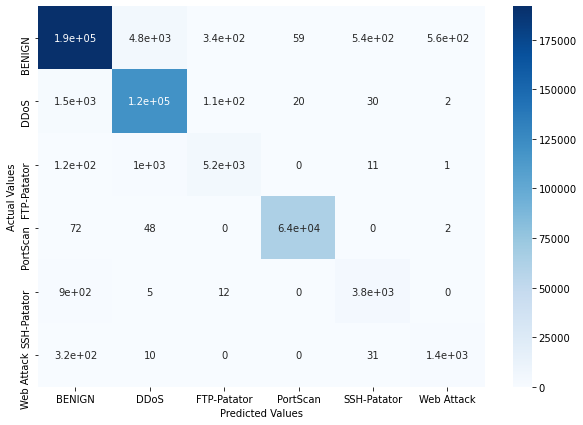

In [35]:
cm=confusion_matrix(y_train,predictions)
labels = ['BENIGN', 'DDoS', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'Web Attack']
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')